In [2]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from PIL import Image
import os
from sklearn.datasets import load_digits
import seaborn as sns
import umap.umap_ as umap

c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\brand\AppData\Local\Temp\ipykernel_24028\3599922485.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS)


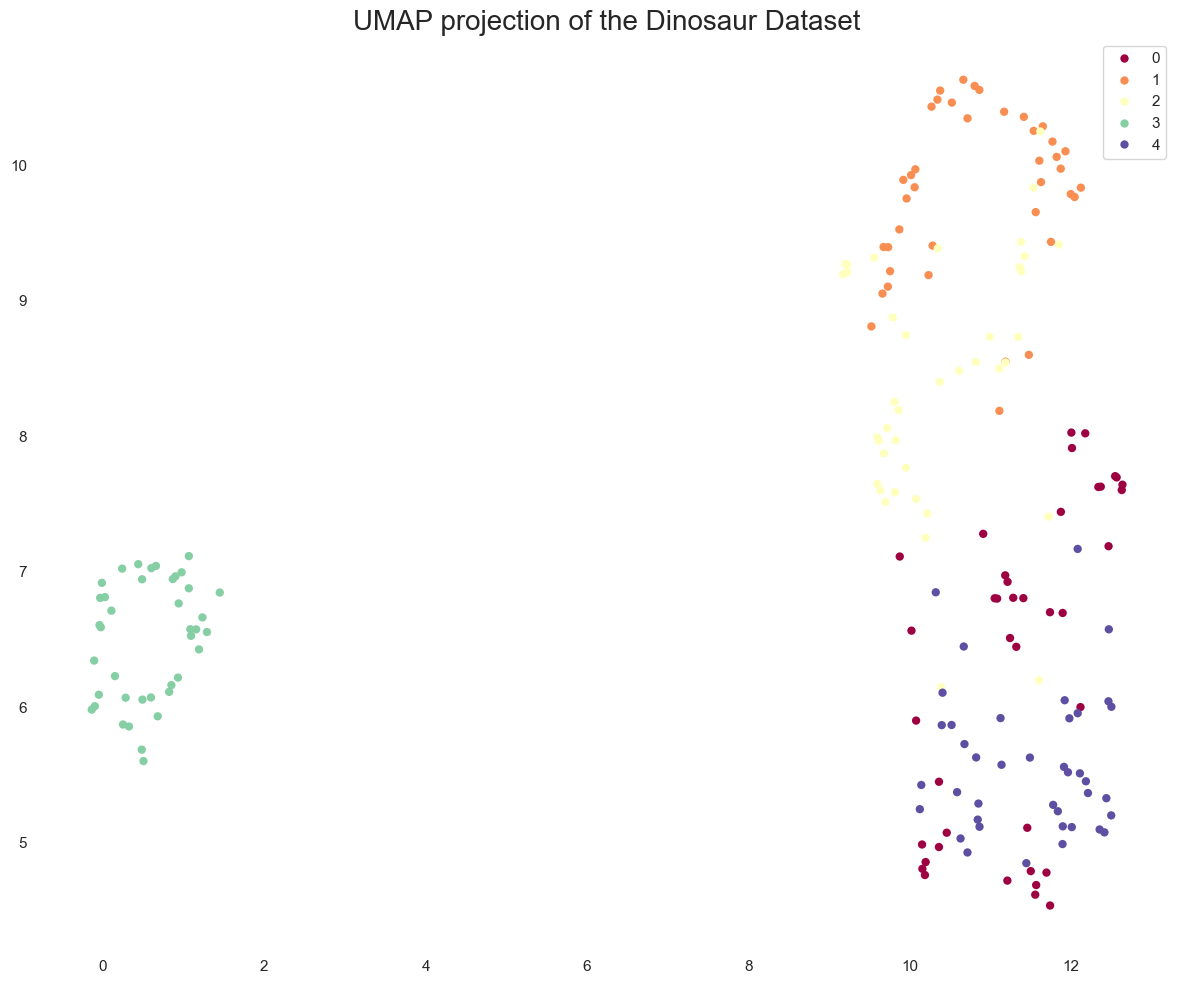

In [30]:

def load_images_from_folder_grey(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.convert('L')
            img = img.resize((64, 64), Image.ANTIALIAS)
            img_array = np.array(img).flatten()
            images.append(img_array)
    return images


def load_images_from_folder(folder):
    avg_intensities = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img.mode != 'RGBA':
            img = img.convert('RGBA')
        img = img.resize((64, 64), Image.ANTIALIAS)
        img_array = np.array(img)
        avg_intensity = img_array.mean(axis=(0, 1))
        avg_intensities.append(avg_intensity)
    return avg_intensities


base_path = 'data/'
folders = ['ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceratops']


all_images = []
labels = []  
for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    images = load_images_from_folder_grey(folder_path)
    all_images.extend(images)
    labels.extend([i] * len(images)) 


image_array = np.array(all_images)


umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit_transform(image_array)

sns.set_theme(style="white", context="notebook", rc={"figure.figsize": (12, 10)})

scatter = sns.scatterplot(
    x=umap_result[:, 0], 
    y=umap_result[:, 1], 
    hue=labels, 
    palette=sns.color_palette("Spectral", as_cmap=True),  
    legend='full',
    edgecolor='none'
)

sns.despine(left=True, bottom=True)


plt.title('UMAP projection of the Dinosaur Dataset', fontsize=20)

plt.tight_layout()
plt.show()



In [5]:
img = 'data/ankylosaurus/1.png'

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([252, 252, 252, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([169, 255, 253, ..., 253, 255, 206], dtype=uint8),
 array([255, 255, 255, ..., 252, 255, 148], dtype=uint8),
 array([253, 253, 253, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 253, 253, 253], dtype=uint8),
 array([164, 255, 253, ..., 253, 255, 181], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 248], dtype=uint8),
 array([248, 248, 248, ..., 247, 247, 247], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([252, 252, 252, ..., 252, 252, 252], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([249, 2

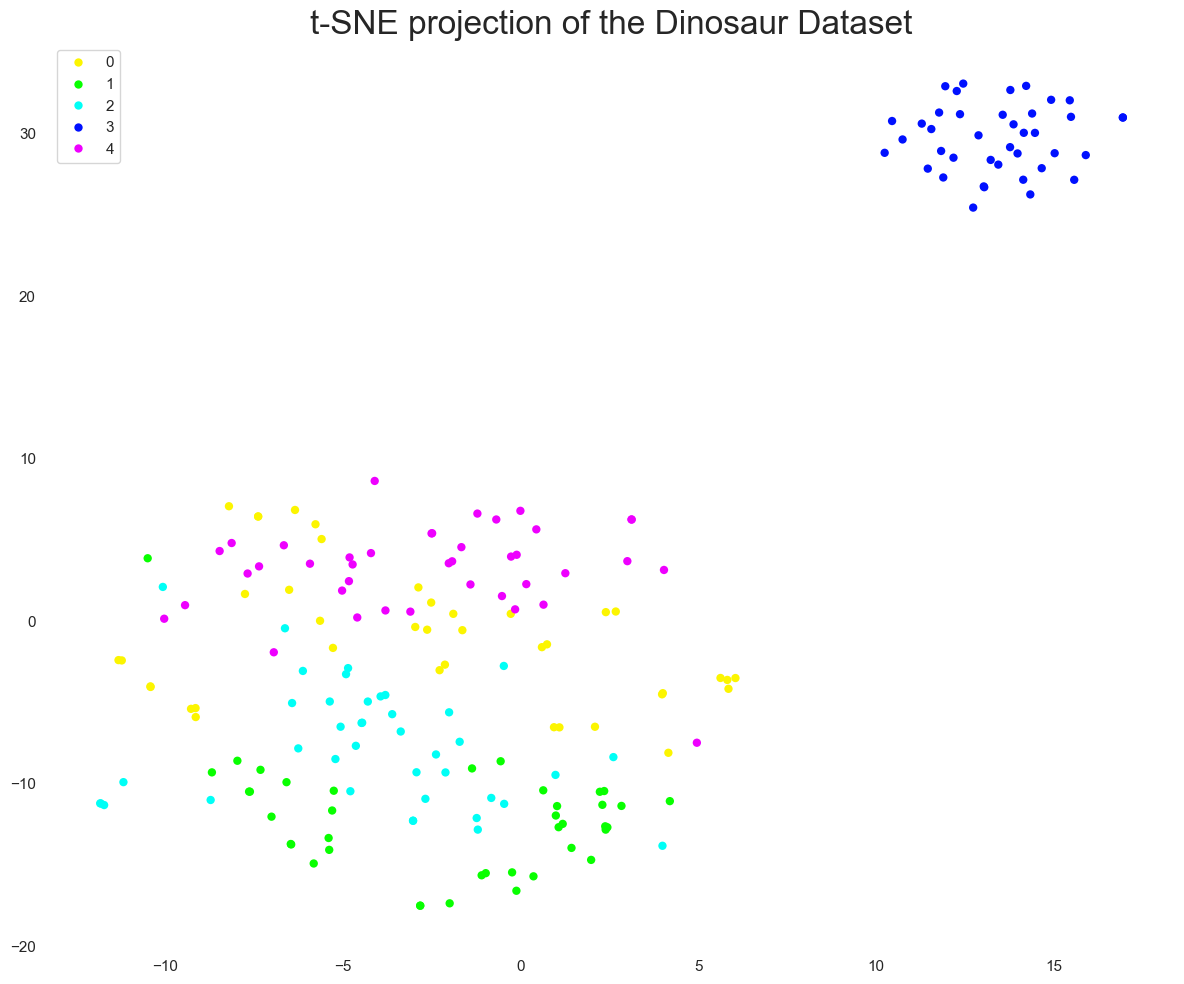

In [29]:
from sklearn.manifold import TSNE

tsne_result = TSNE(n_components=2).fit_transform(image_array)

sns.set_theme(style="white", palette="muted")

plt.figure(figsize=(12, 10))

scatter = sns.scatterplot(
    x=tsne_result[:, 0], 
    y=tsne_result[:, 1], 
    hue=labels, 
    palette=sns.color_palette("hsv", len(folders)),
    legend='full',
    edgecolor='none' 
)

sns.despine(left=True, bottom=True)

plt.title('t-SNE projection of the Dinosaur Dataset', fontsize=24)
plt.tight_layout()

plt.show()

In [16]:
all_avg_intensities = []
labels = []  
for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    avg_intensities = load_images_from_folder(folder_path)
    all_avg_intensities.extend(avg_intensities)
    labels.extend([i] * len(avg_intensities))

avg_intensity_array = np.array(all_avg_intensities)


C:\Users\brand\AppData\Local\Temp\ipykernel_24028\4257134143.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS)


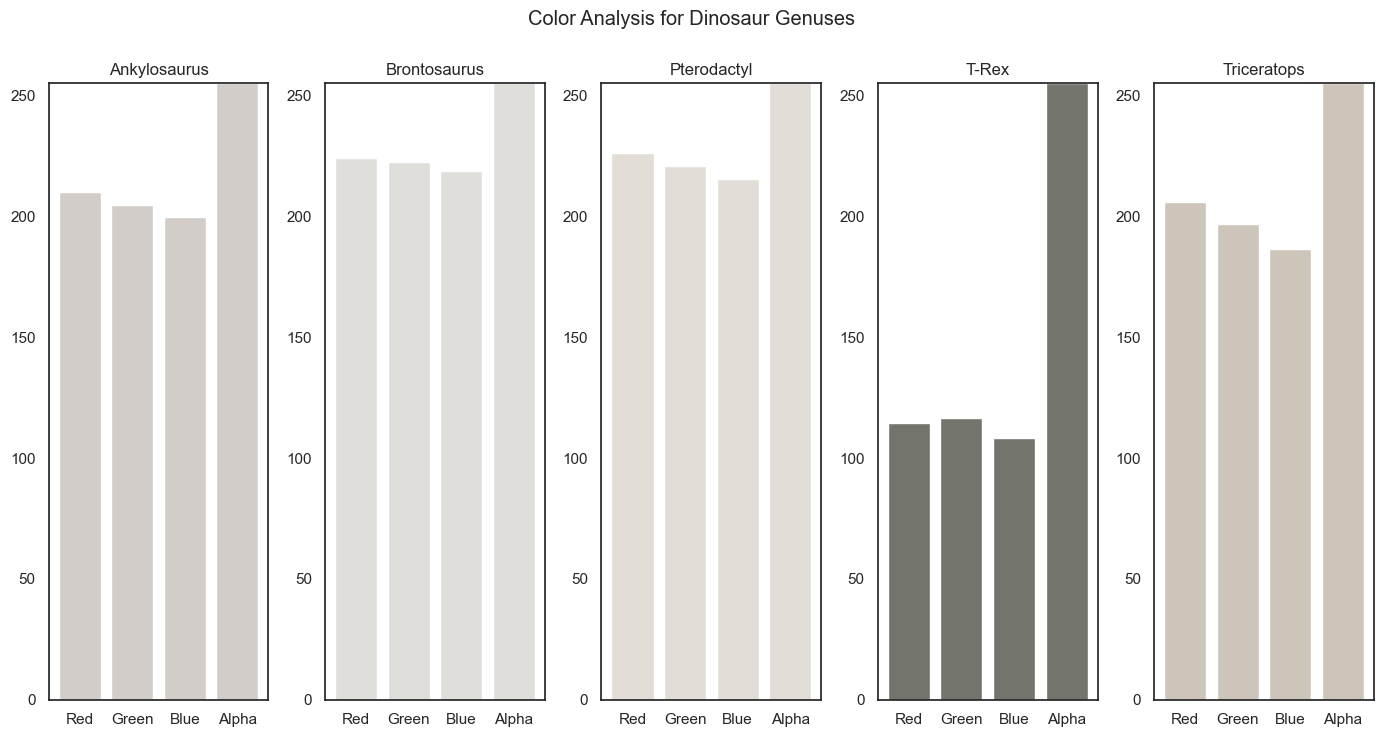

In [28]:
import matplotlib.pyplot as plt
import numpy as np

labels_array = np.array(labels)
plt.figure(figsize=(14, 7))

categories = ['Ankylosaurus', 'Brontosaurus', 'Pterodactyl', 'T-Rex', 'Triceratops']
channels = ['Red', 'Green', 'Blue', 'Alpha']

for i, category in enumerate(categories):
    category_intensities = avg_intensity_array[labels_array == i]
    mean_intensities = np.mean(category_intensities, axis=0)
    ax = plt.subplot(1, 5, i+1)
    colors = mean_intensities[:3] / 255  
    ax.bar(channels, mean_intensities, color=[colors]*len(channels))  
    ax.set_ylim(0, 255)
    ax.set_title(category)

plt.tight_layout()
plt.suptitle('Color Analysis for Dinosaur Genuses', y=1.05)
plt.show()